In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Data Profilling**

In [3]:
train = pd.read_csv('../input/carinsuranceclaimprediction-classification/train.csv')
test = pd.read_csv('../input/carinsuranceclaimprediction-classification/test.csv')

In [14]:
train.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [8]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
train.select_dtypes("object").nunique()

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                 

In [11]:
numerical_feature=[i for i in train.columns if train[i].dtype!='O']
categorical_feature=[i for i in train.columns if train[i].dtype=='O']

In [13]:
for i in categorical_feature:
    print(train[i].unique())
    print(f"{'*'*20}")

['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
********************
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
********************
['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
********************
['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
********************
['CNG' 'Petrol' 'Diesel']
********************
['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
********************
['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
********************
['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
********************
['

In [15]:
def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

In [16]:
data_preprocessor(train)

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='is_claim', ylabel='count'>

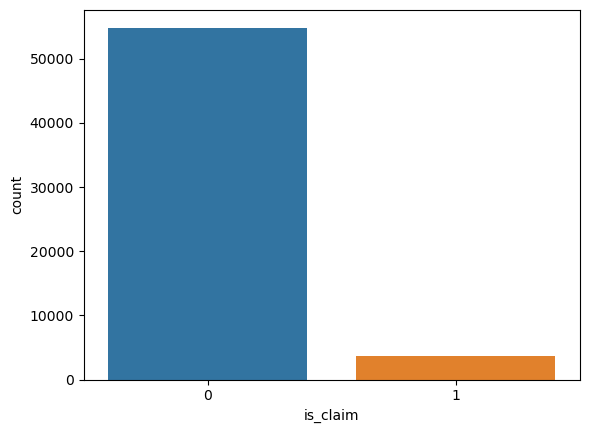

In [17]:
sns.countplot(x='is_claim',data=train)

* This is a imbalanced dataset. We need to handle it before feed to model *

## Univariate Analysis

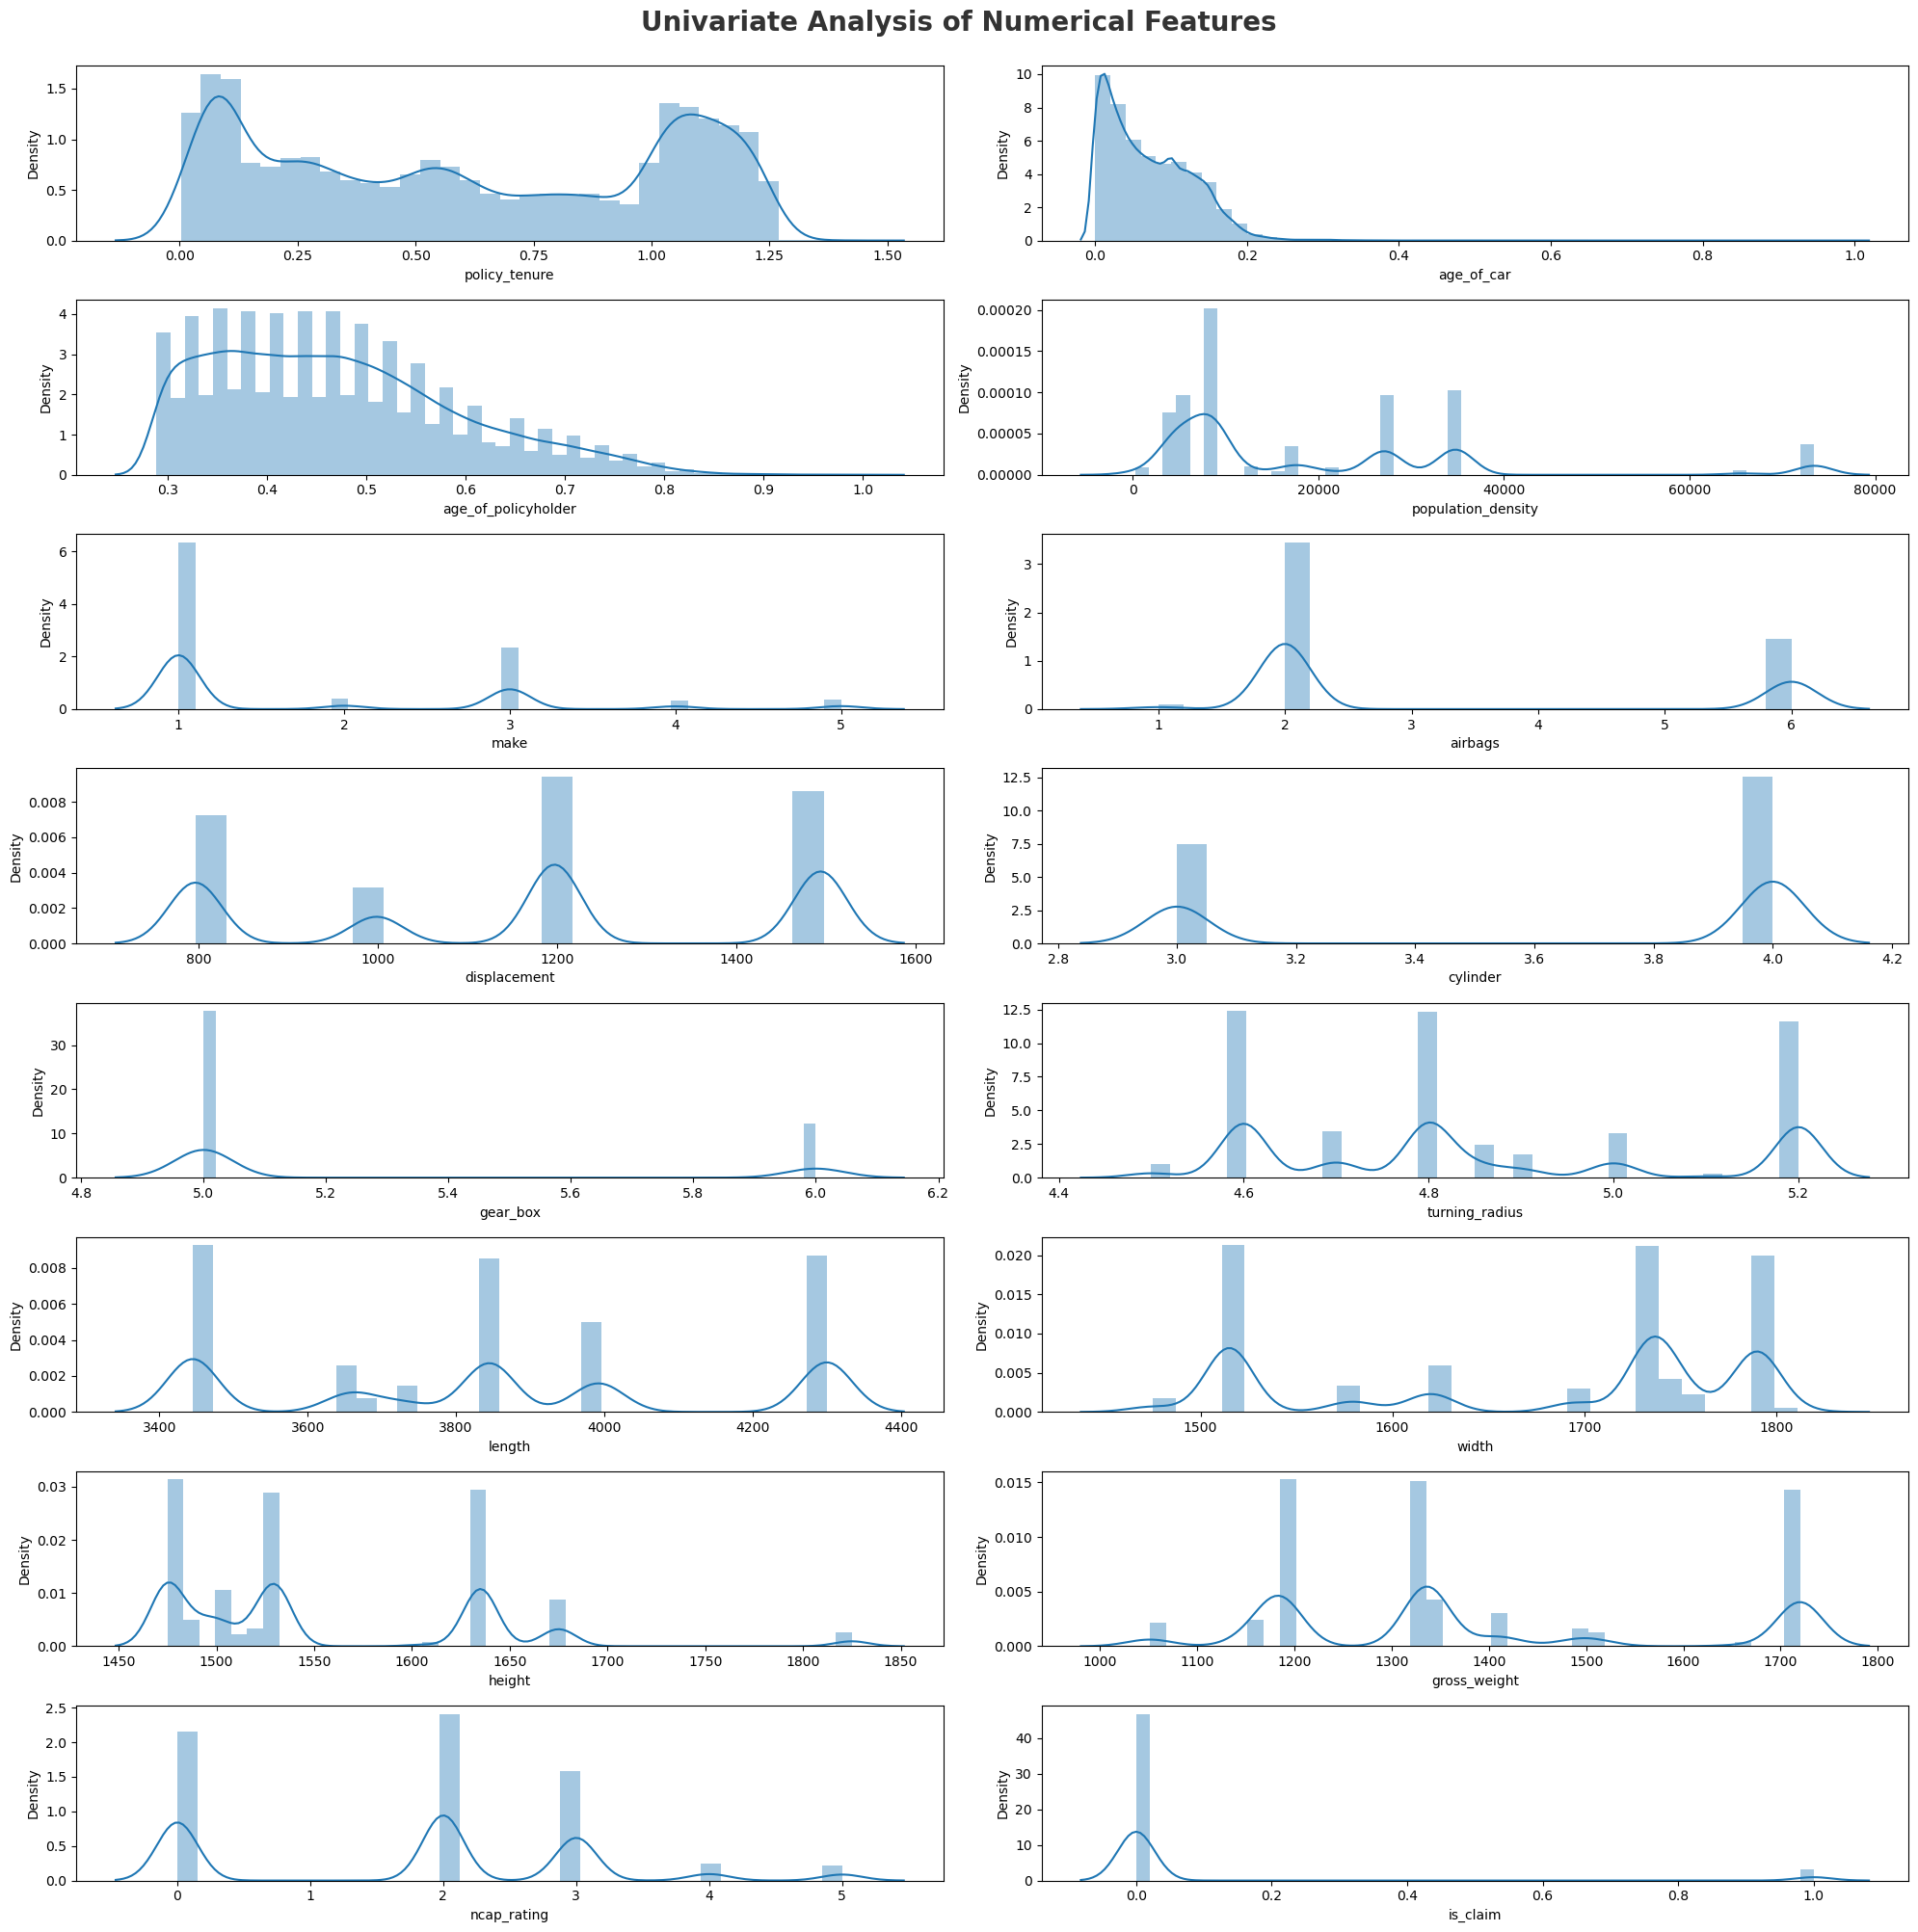

In [18]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(8, 2, i+1)
    sns.distplot(train[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

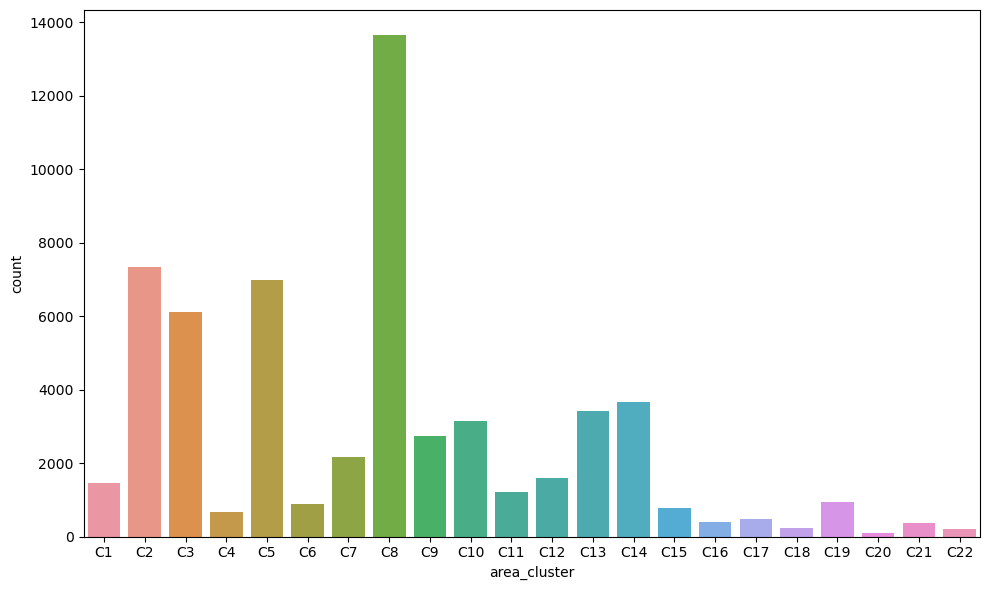

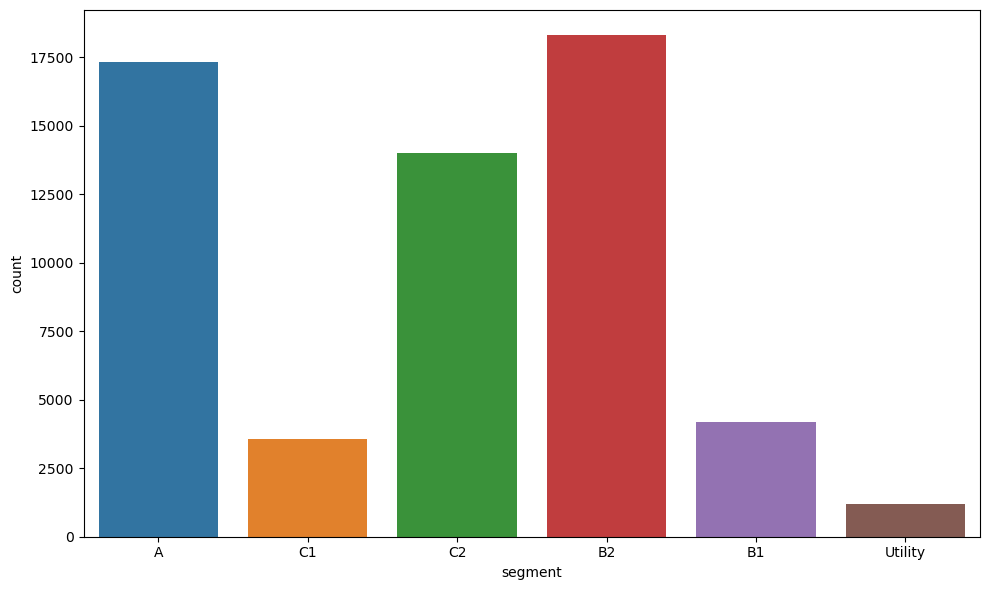

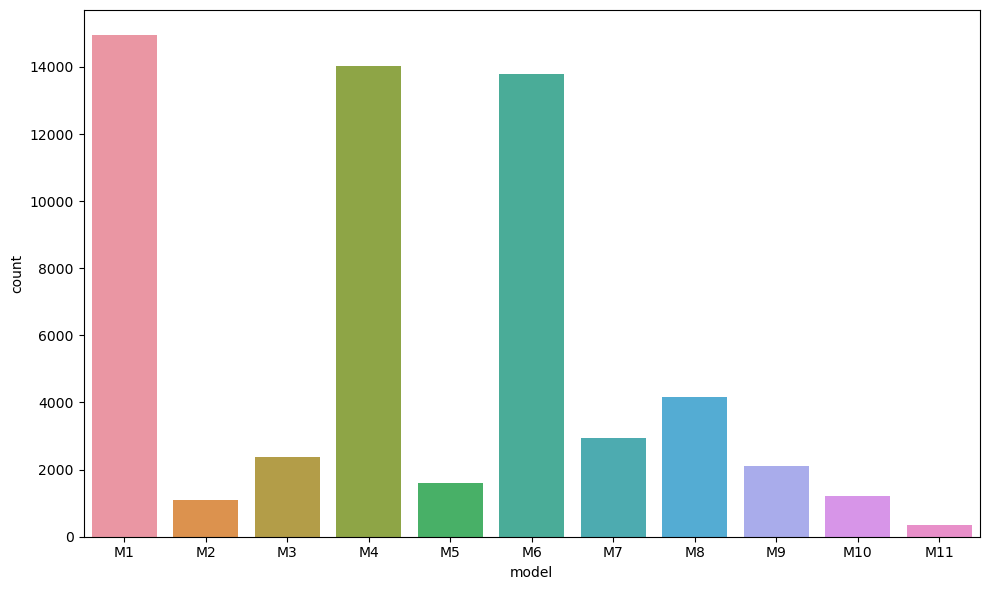

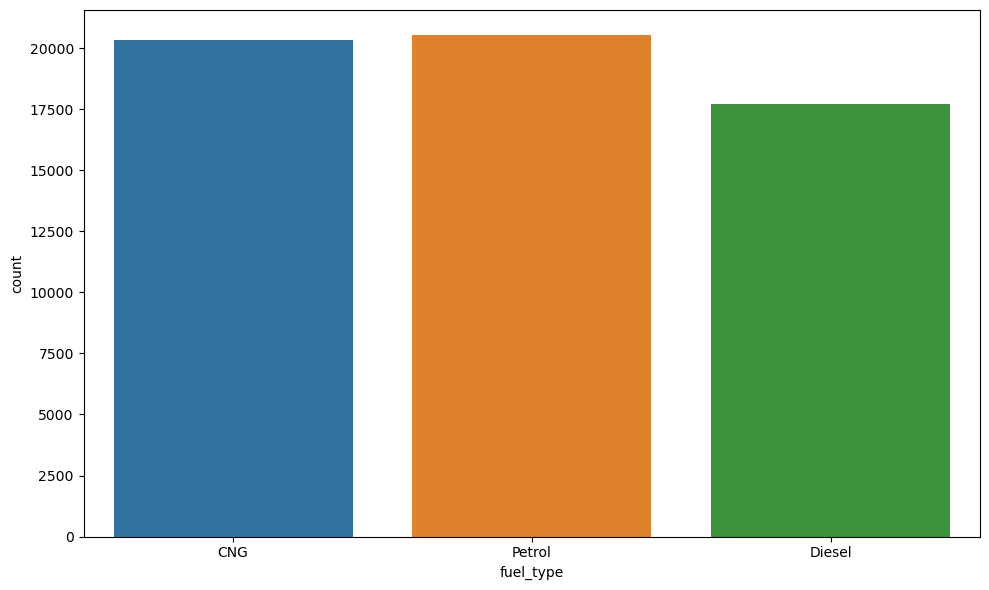

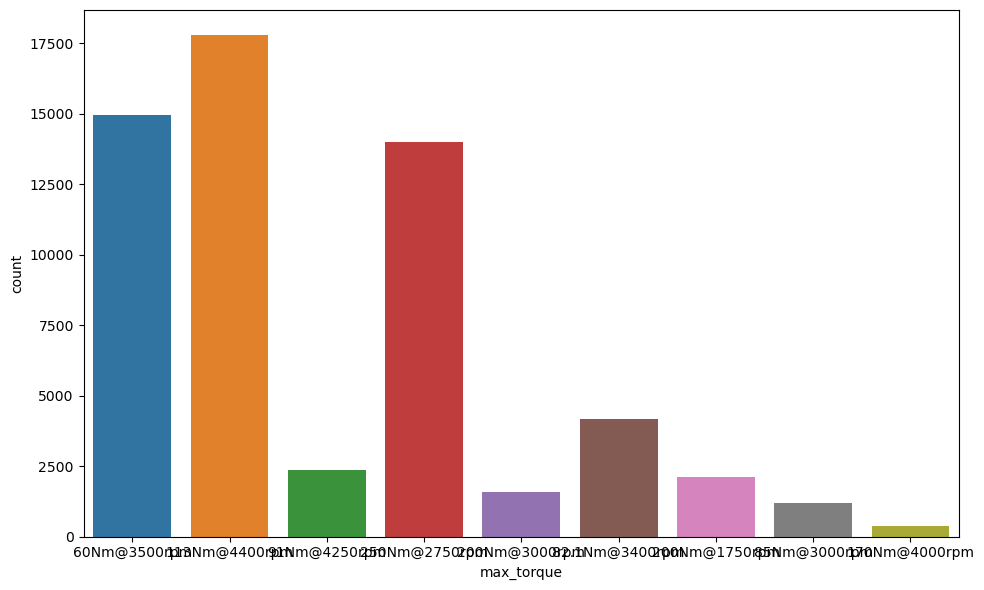

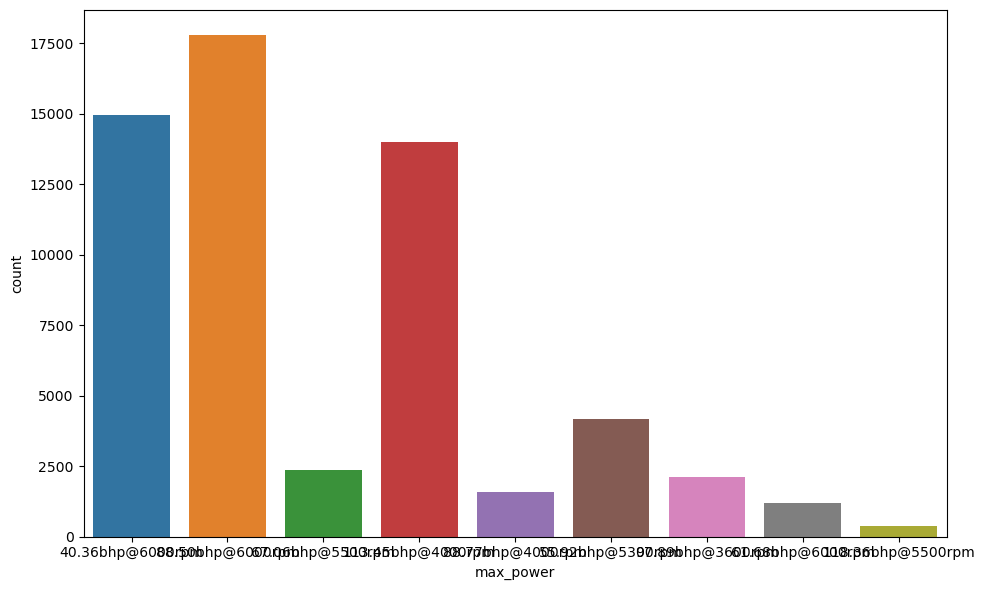

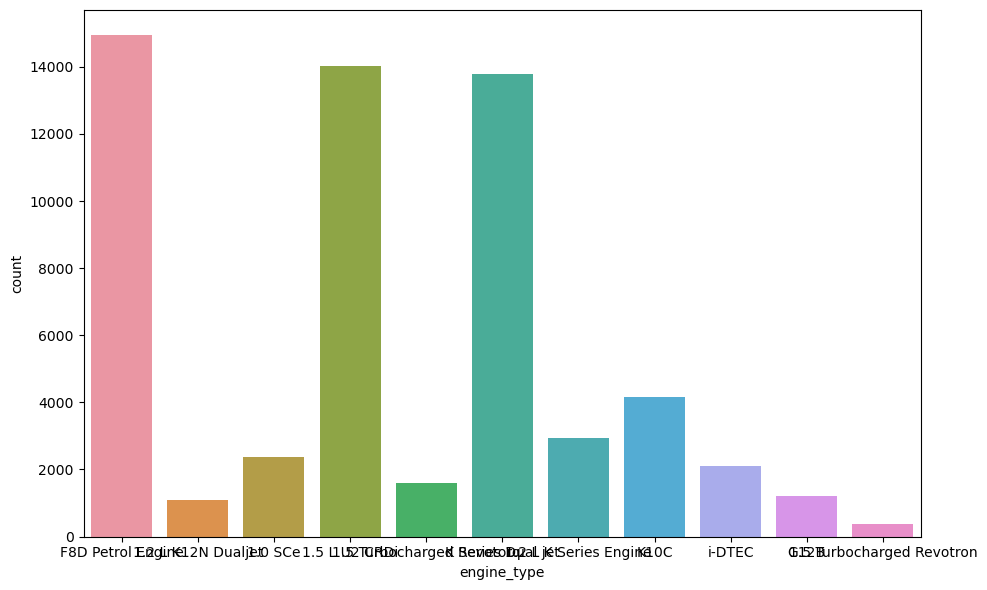

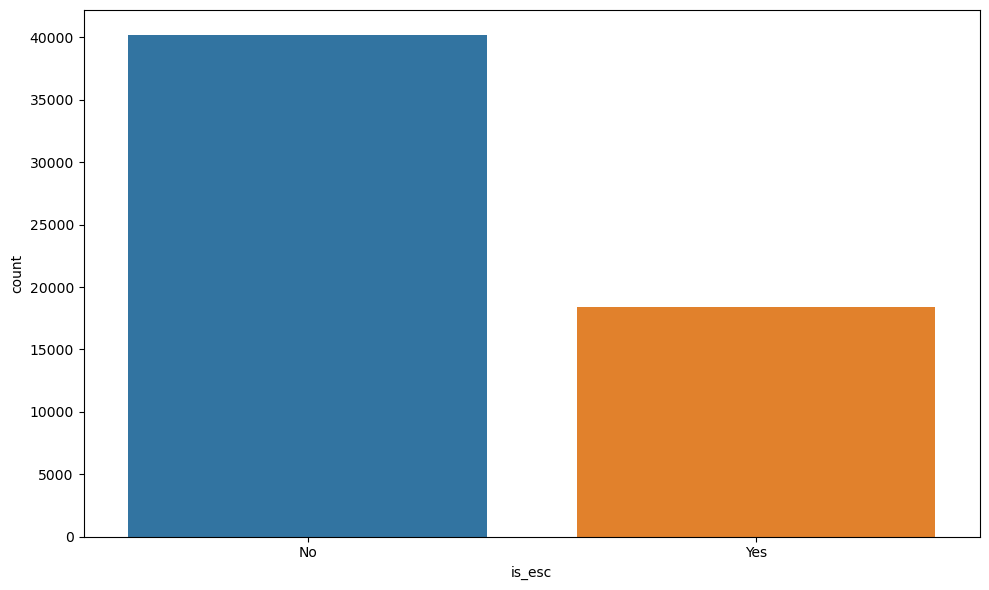

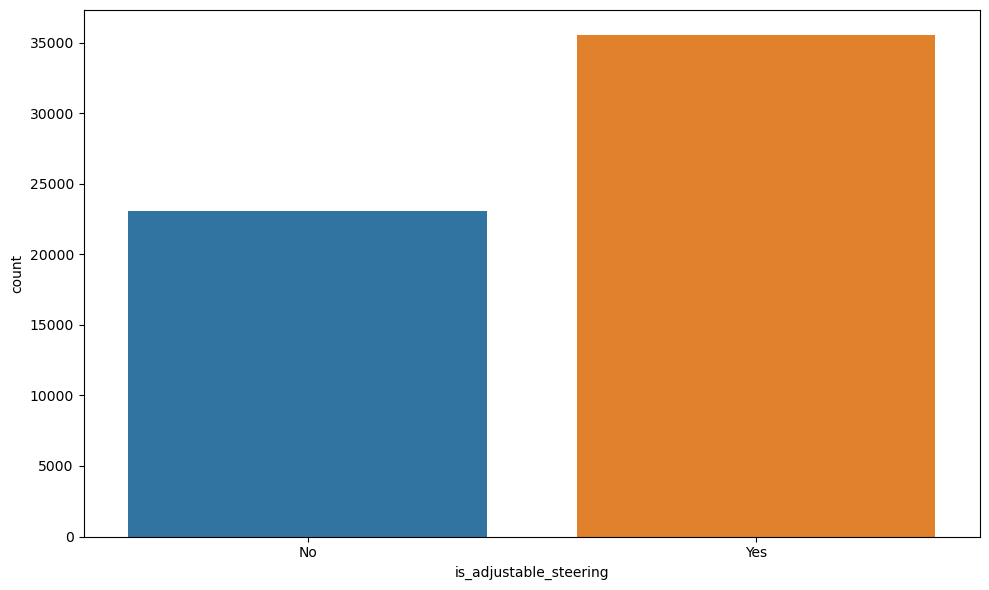

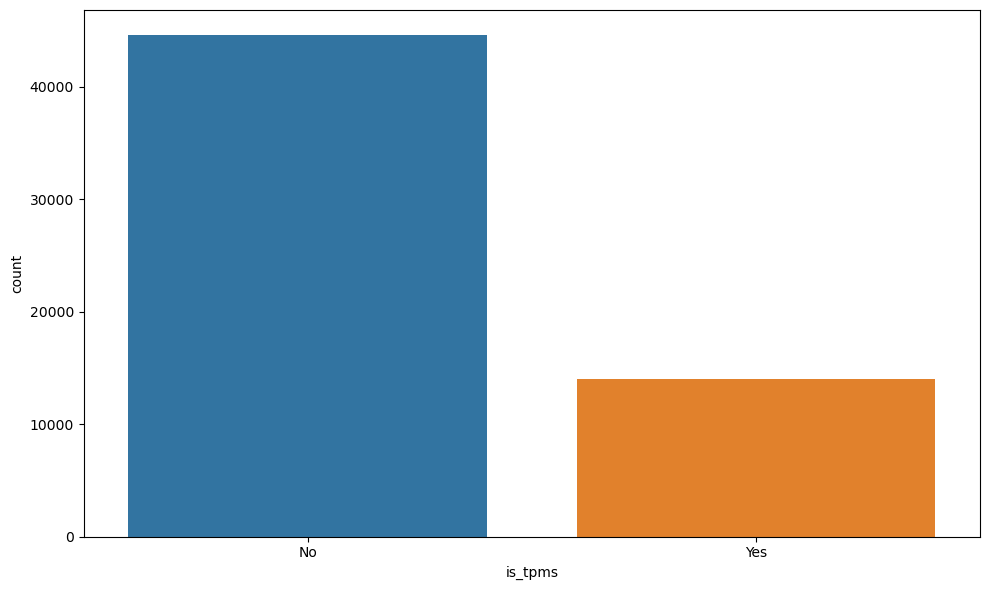

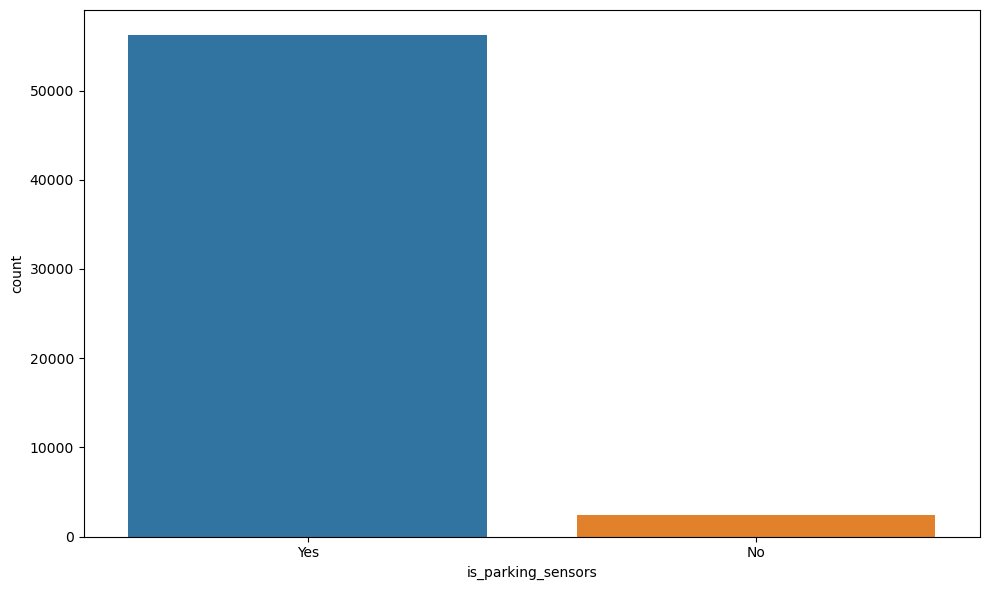

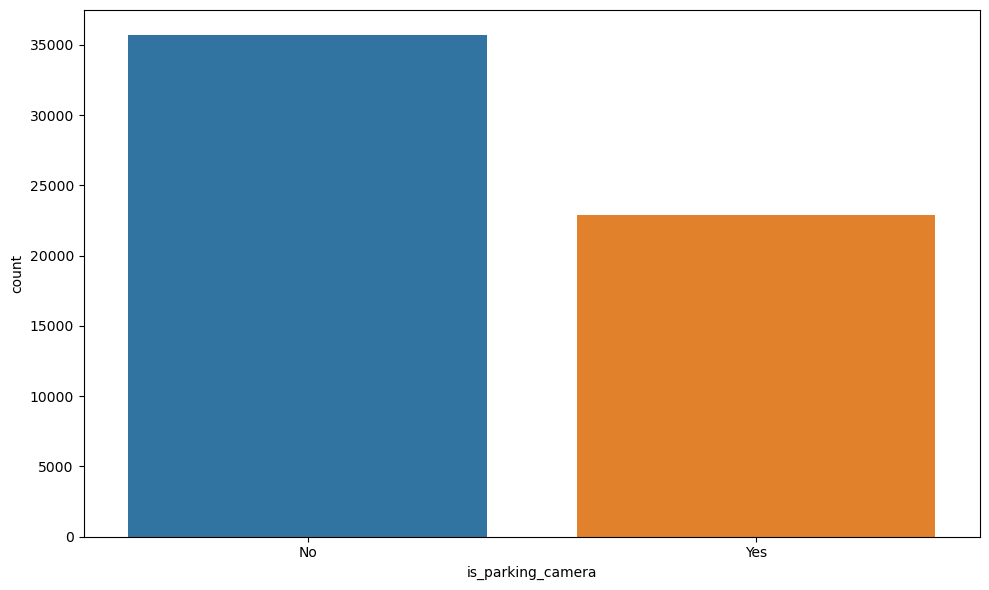

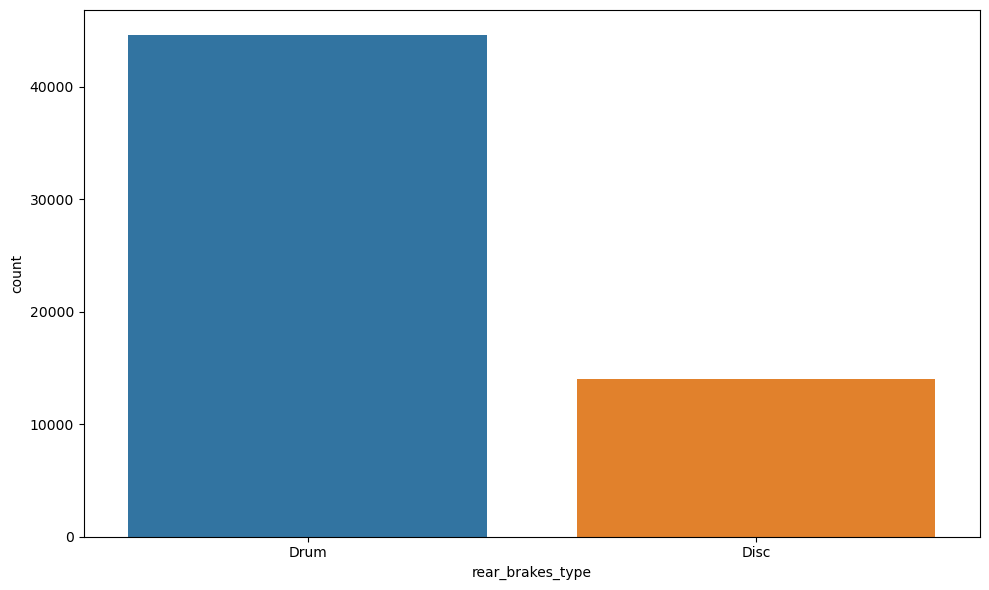

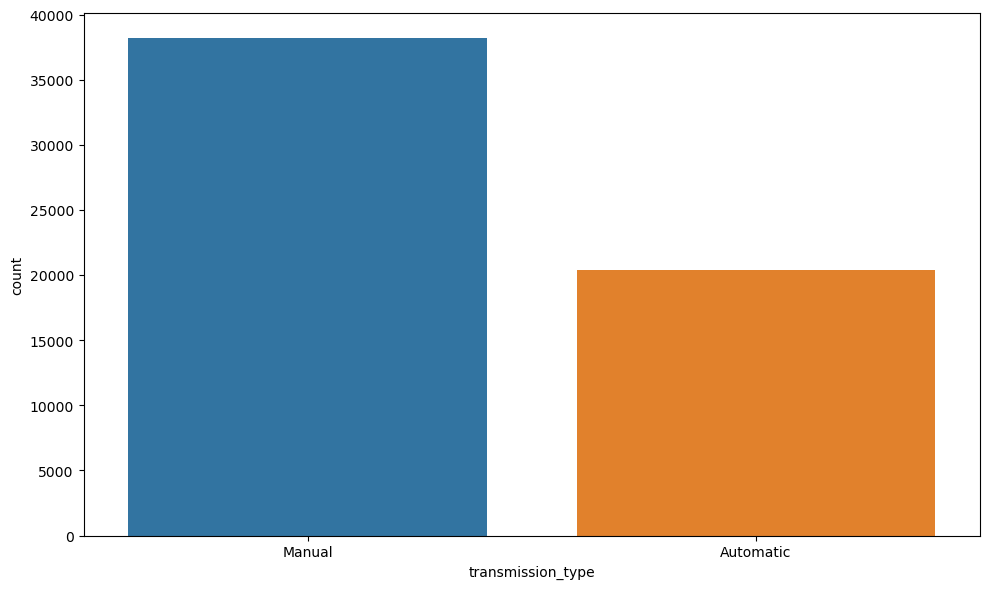

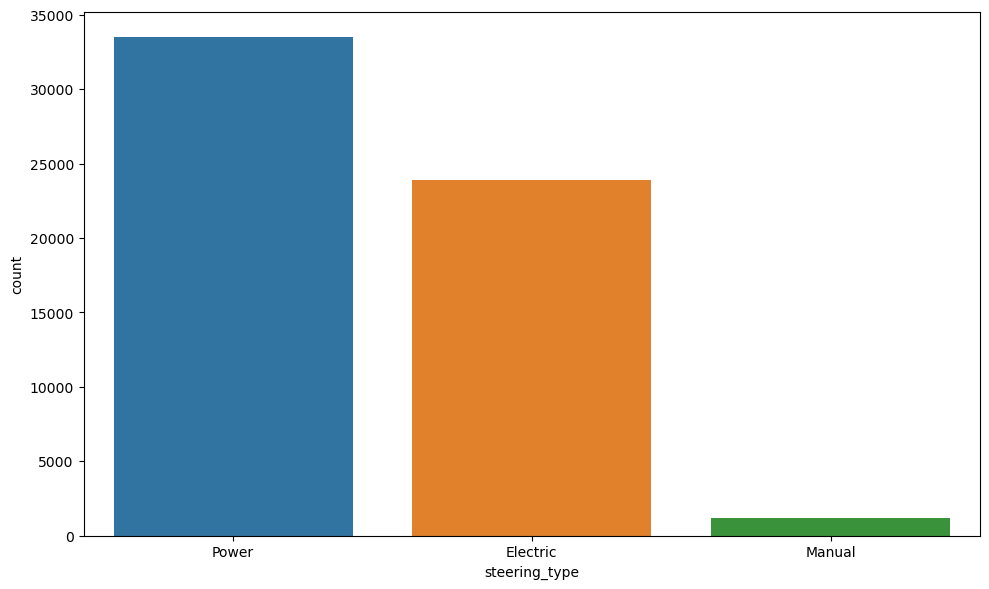

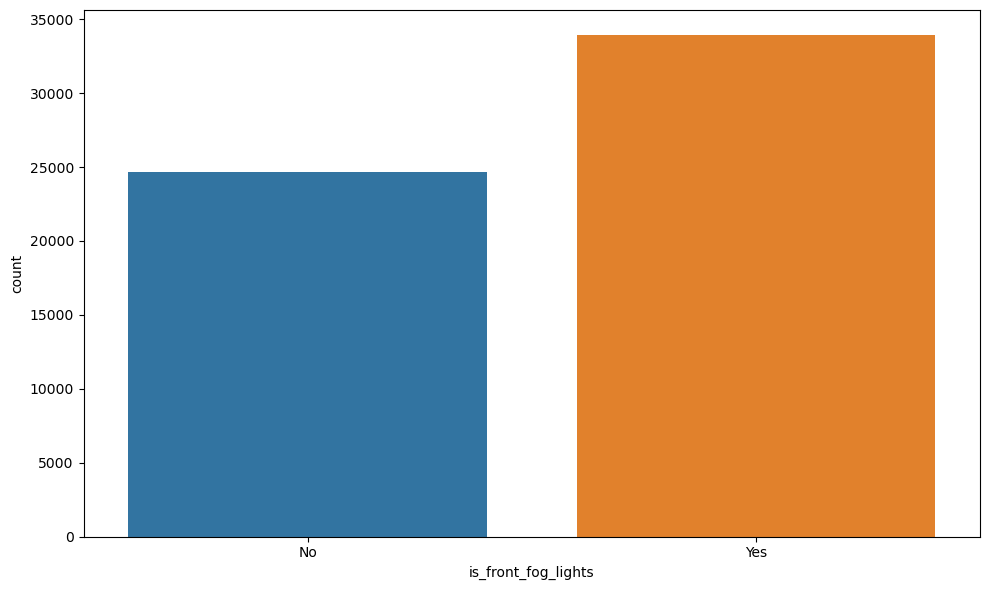

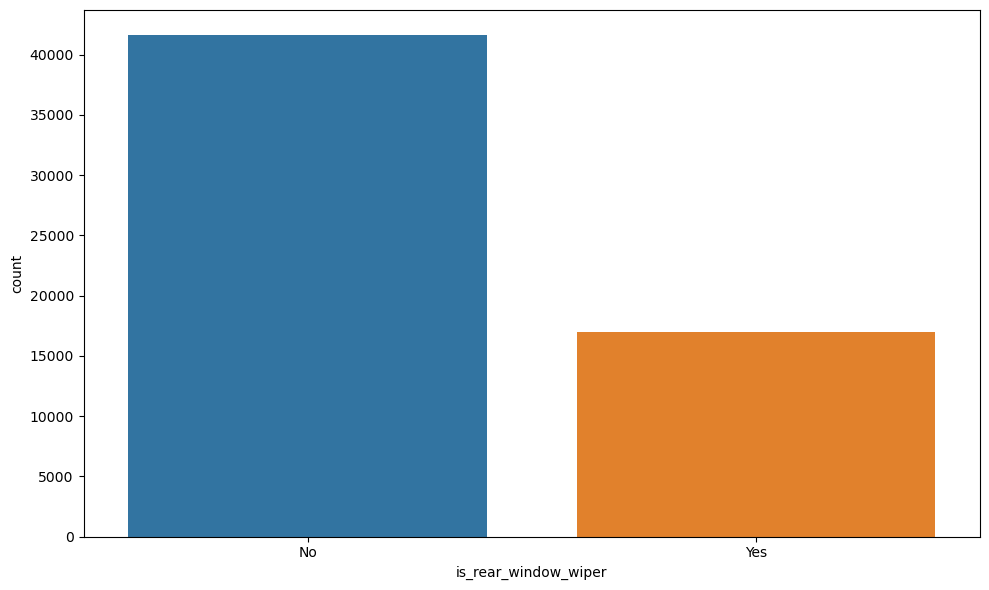

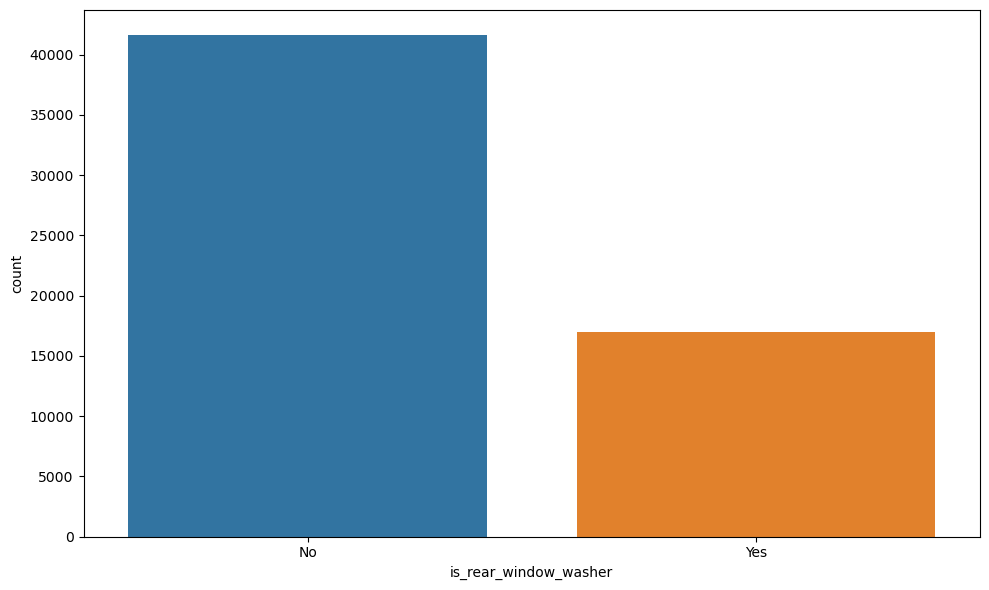

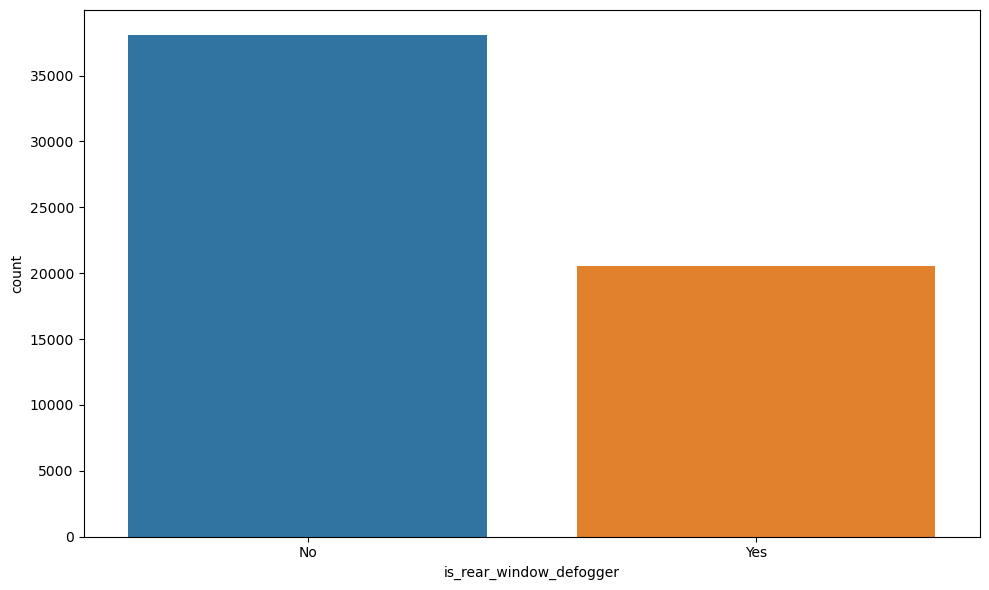

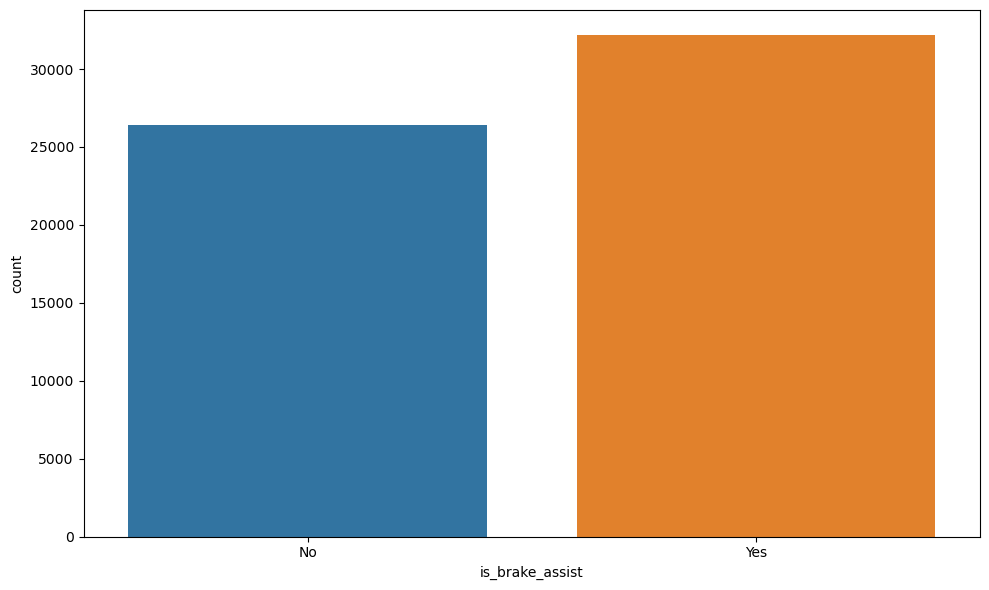

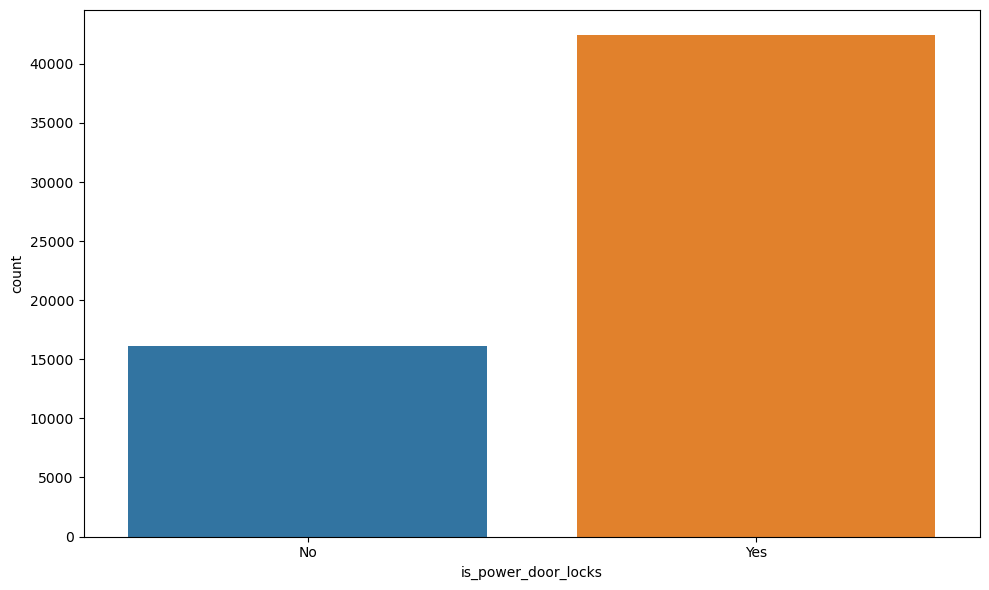

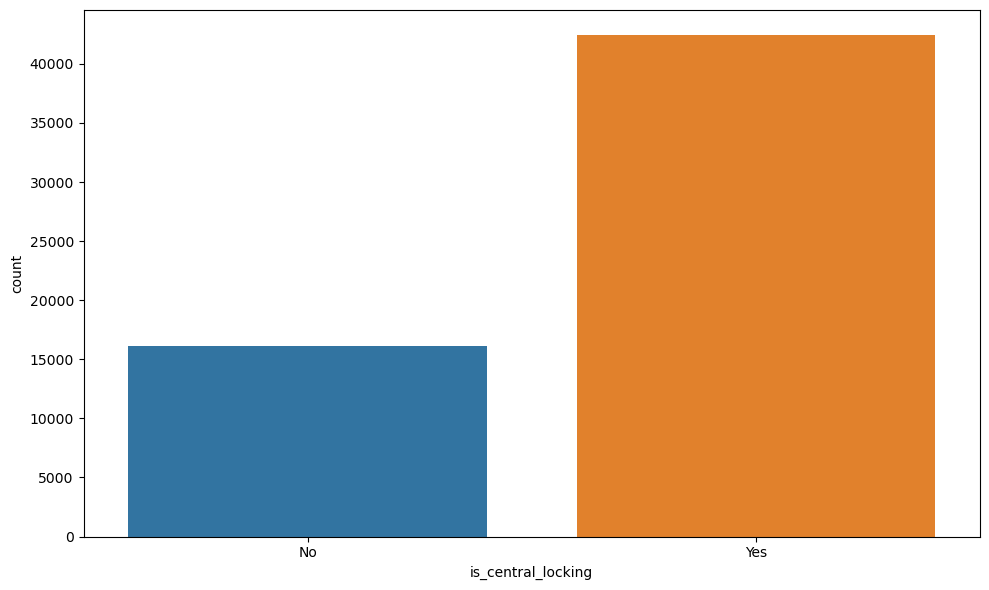

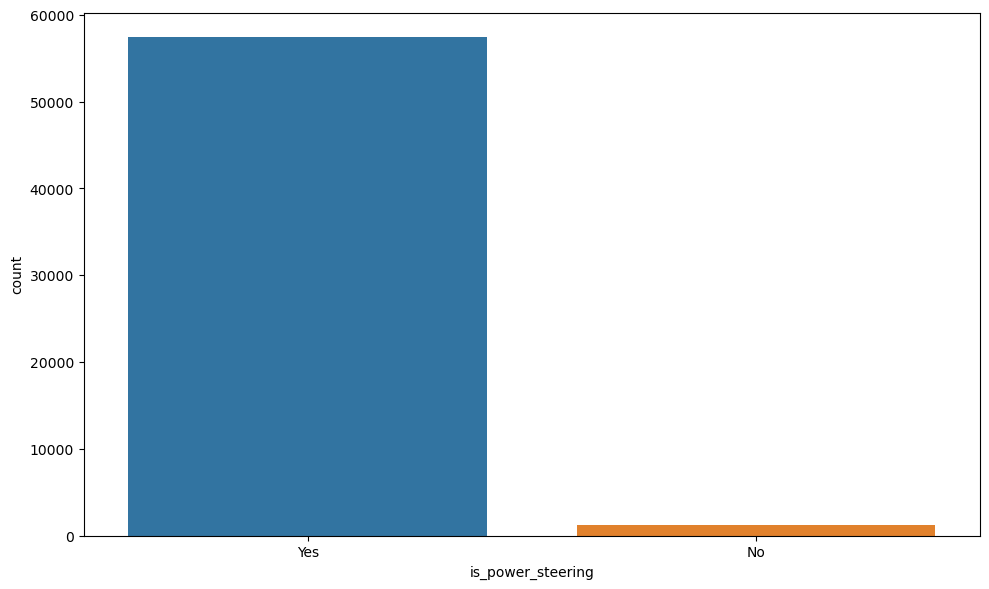

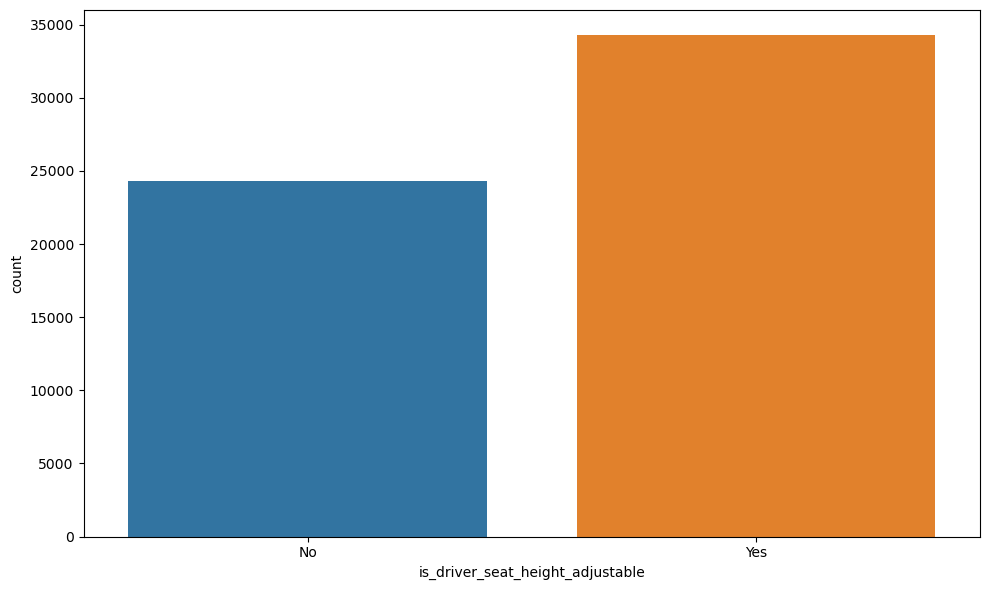

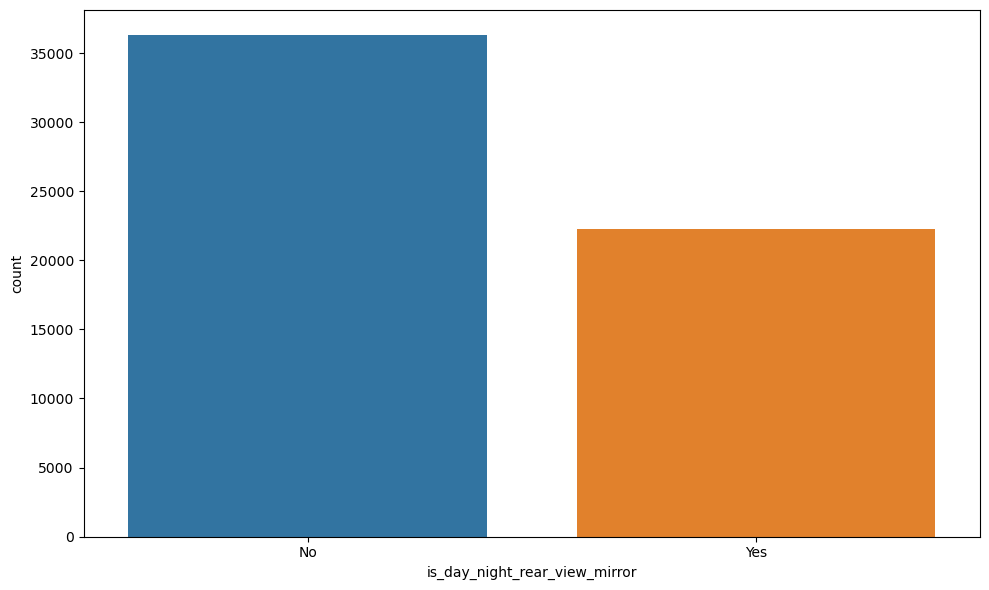

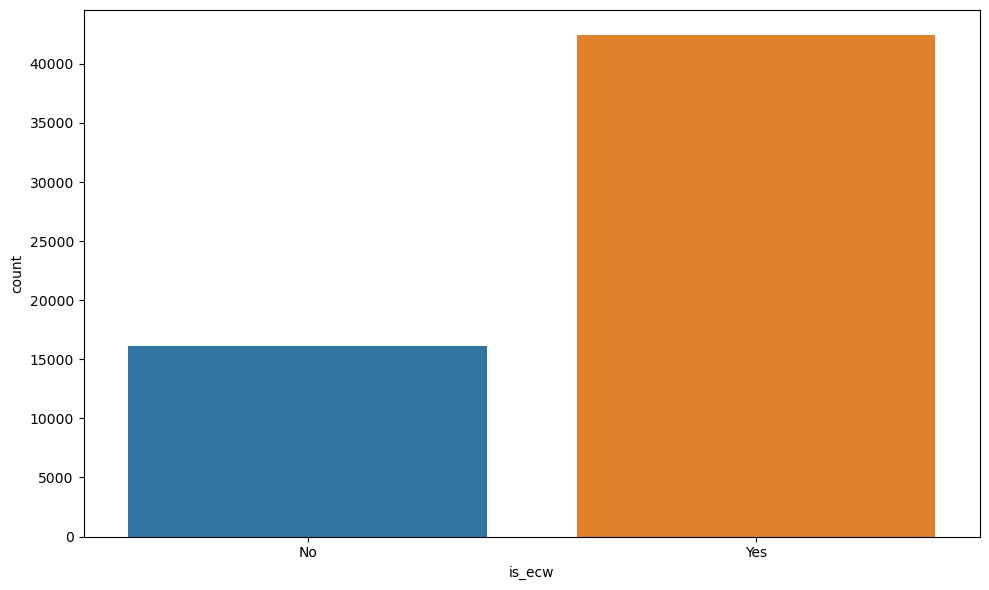

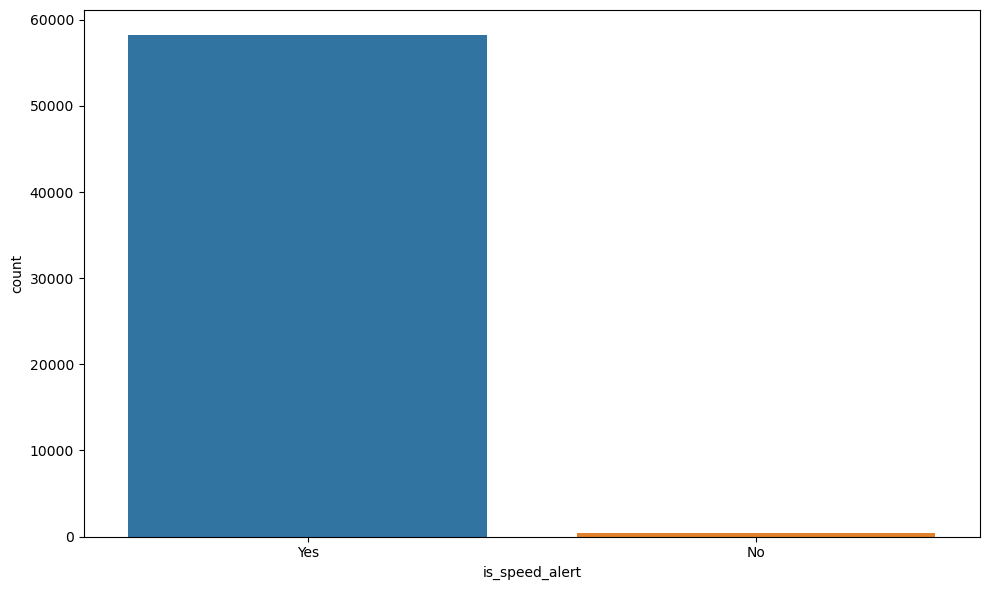

In [21]:
for i in range(1,len(categorical_feature)):
    plt.figure(figsize=(10,6))
    sns.countplot(x=train[categorical_feature[i]],data=train)
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

Text(0.5, 1.0, 'Numbers of sectors based on claims')

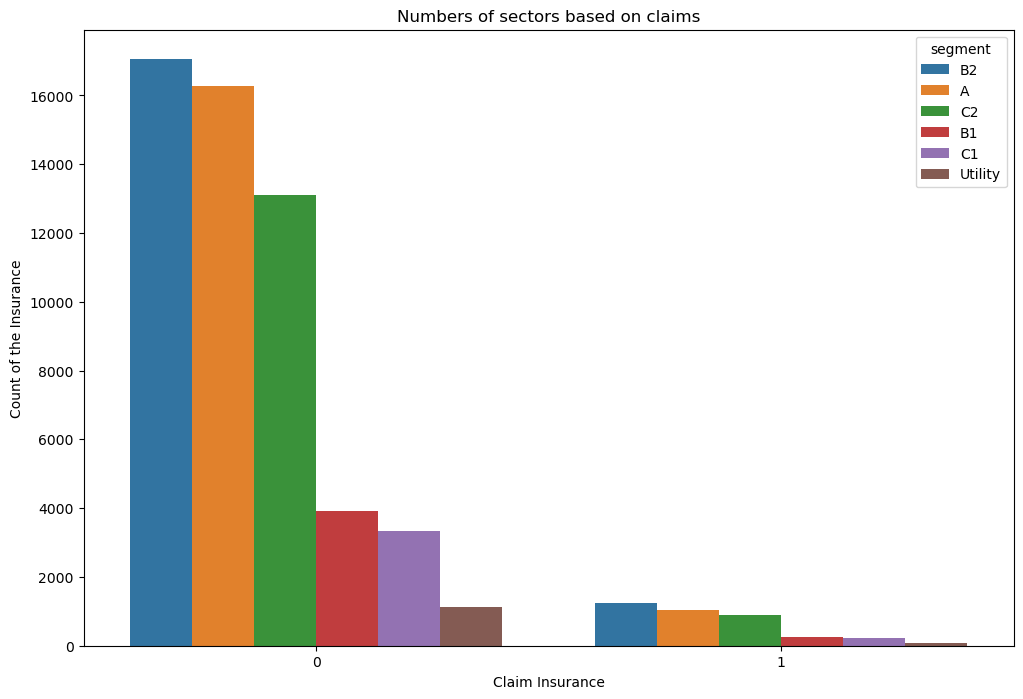

In [23]:
df = train.groupby("is_claim")["segment"].value_counts().rename("count").to_frame().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="is_claim",
           y="count",
           hue="segment",
           data=df)
plt.xlabel("Claim Insurance")
plt.ylabel("Count of the Insurance")
plt.title("Numbers of sectors based on claims")

<AxesSubplot:xlabel='model'>

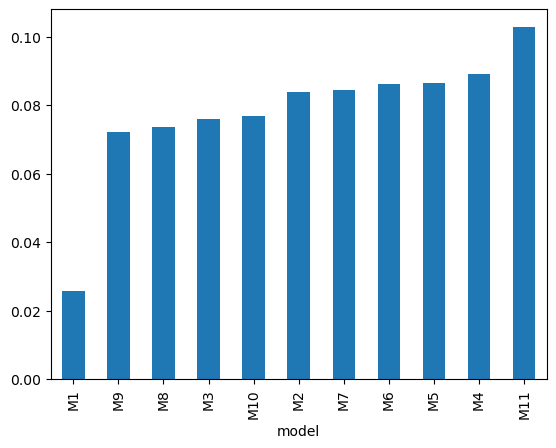

In [24]:
train.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")

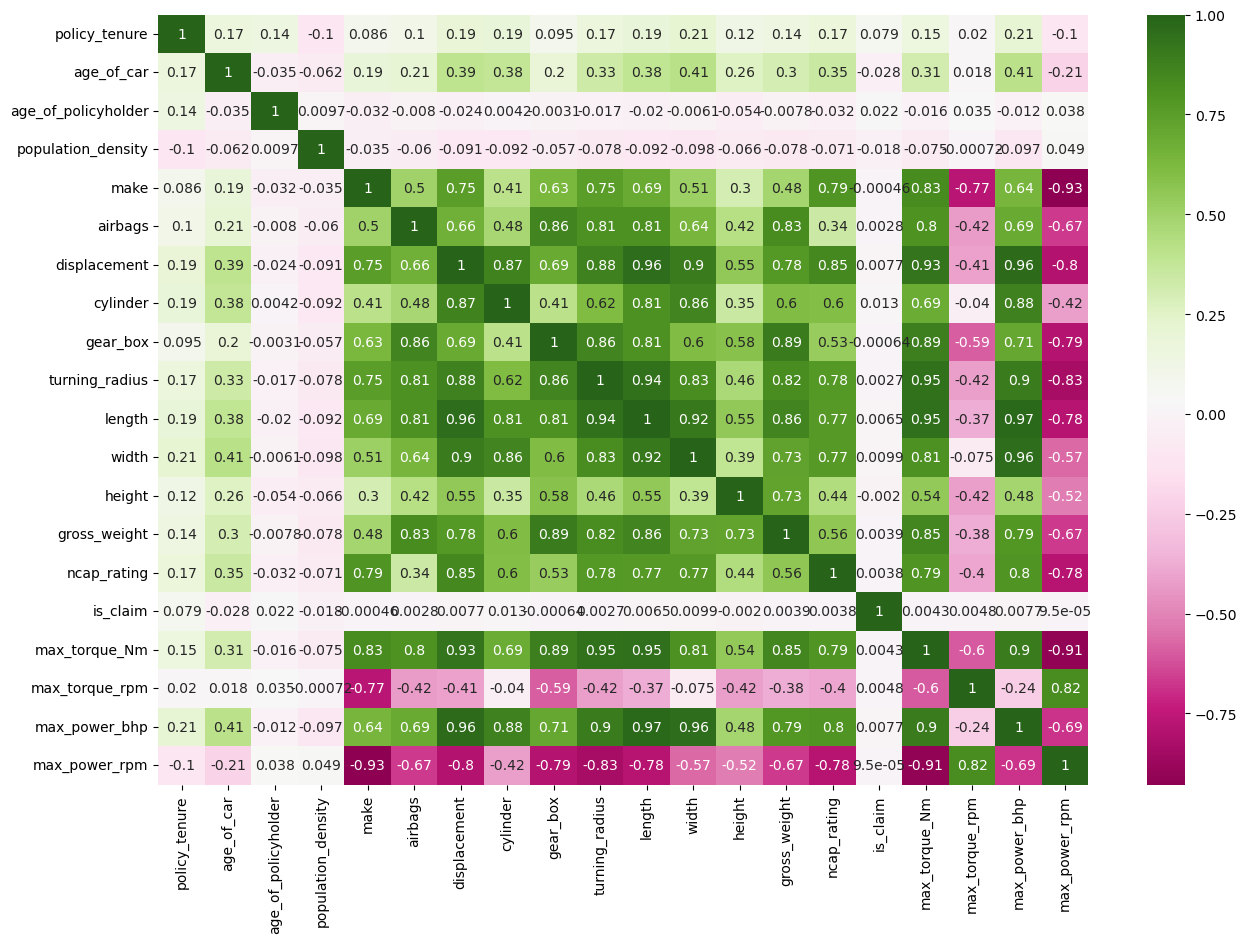

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, cmap="PiYG", annot_kws={"size": 10})
plt.show()

### Feature Engneering

### Label encoing

In [26]:
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')

In [28]:
update_categorical_feature=[i for i in train.columns if train[i].dtype=='O']

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [32]:
for i in categorical_feature:

    if i in ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type','is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']:
        train[i] = le.fit_transform(train[i].values.reshape(-1,1))

### Frequency Encoding

In [34]:
cols = [i for i in update_categorical_feature if train[i].nunique()>5]

for feature in cols:
    g = dict(train.groupby(feature)['is_claim'].mean())
    train[feature] = train[feature].replace(g)

In [35]:
train = pd.get_dummies(train,columns=['fuel_type','steering_type'],drop_first = True)

In [36]:
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'turning_radius', 'length', 'width',
       'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'steering_type_Manual', 'steering_type_Power'],
      dtype='object')

** Splitting into train and test set **

In [37]:
X =train.drop(['policy_id','is_claim','max_torque','max_power'], axis=1)
y =train['is_claim']

## Feature selection

In [38]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [39]:
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.00307748, 0.00337779, 0.        , 0.        , 0.00244066,
       0.00219191, 0.0006197 , 0.00109924, 0.00172739, 0.00509124,
       0.00151851, 0.00630513, 0.00235752, 0.01063715, 0.00238313,
       0.00730845, 0.00222634, 0.00538222, 0.00426703, 0.00679257,
       0.00119666, 0.00278668, 0.00208159, 0.00062644, 0.00254814,
       0.00484224, 0.00131234, 0.00024273, 0.00130479, 0.00379434,
       0.0069371 , 0.00548644, 0.01105956, 0.00488615, 0.00220575,
       0.00689331, 0.01143931, 0.00308718, 0.00025803, 0.00273336,
       0.00188143, 0.00573595, 0.00106872, 0.        , 0.0005851 ,
       0.00405949])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

is_speed_alert                      0.011439
is_power_steering                   0.011060
is_parking_sensors                  0.010637
rear_brakes_type                    0.007308
is_power_door_locks                 0.006937
is_ecw                              0.006893
gear_box                            0.006793
is_adjustable_steering              0.006305
max_power_rpm                       0.005736
is_central_locking                  0.005486
cylinder                            0.005382
airbags                             0.005091
is_driver_seat_height_adjustable    0.004886
is_front_fog_lights                 0.004842
transmission_type                   0.004267
steering_type_Power                 0.004059
is_brake_assist                     0.003794
age_of_car                          0.003378
ncap_rating                         0.003087
policy_tenure                       0.003077
length                              0.002787
max_torque_rpm                      0.002733
gross_weig

<AxesSubplot:>

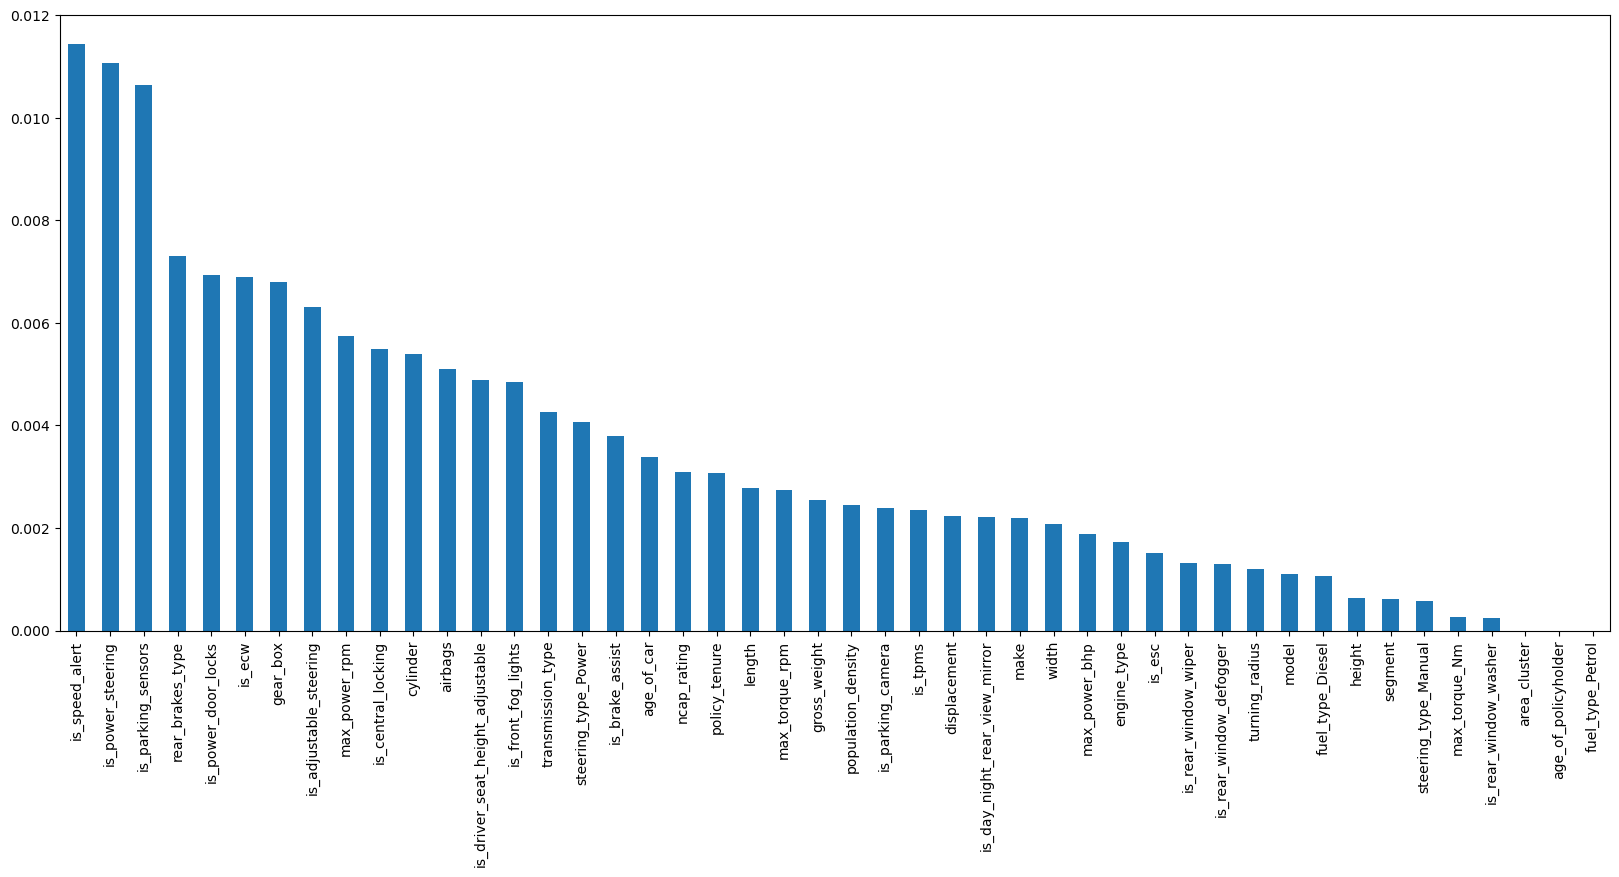

In [41]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Handle Imbalance datasets

In [42]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [45]:
X_train.head(5)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,airbags,...,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power
48218,0.248600,0.08,0.625000,0.069870,8794,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1
21701,1.038842,0.12,0.394231,0.070972,4076,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1
52454,1.234609,0.02,0.480769,0.057745,34738,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1
15288,0.218630,0.01,0.413462,0.070972,4076,1,0.060389,0.061413,0.061413,2,...,1,0,60.0,3500.0,40.36,6000.0,0,0,0,1
45465,0.492282,0.05,0.365385,0.057745,34738,3,0.064275,0.064275,0.064275,6,...,1,3,250.0,2750.0,113.45,4000.0,1,0,0,1


#### Handle Imbalance data with --> SMOTETomek

In [46]:
smt=SMOTETomek()

In [48]:
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)

In [51]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 43825, 1: 3048})
The number of classes after fit Counter({0: 41564, 1: 41564})


#### Handle Imbalance data with -->Over Sampling

In [52]:
os=RandomOverSampler(sampling_strategy='minority')

In [53]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)


In [54]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 43825, 1: 3048})
The number of classes after fit Counter({0: 43825, 1: 43825})


###  Scaling of numerical columns

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [56]:
X_train_os=sc.fit_transform(X_train_os)
X_train_smt=sc.fit_transform(X_train_smt)
X_test=sc.transform(X_test)

# Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [58]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

### OUTPUT result of SMOTETomek

In [59]:
classalgo_test(X_train_smt,X_test,y_train_smt,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
BaggingClassifier,0.962504,0.998160,0.961112,0.962504,0.936428,0.090909,0.013245,0.936428,0.501303
XGBClassifier,0.993564,0.999489,0.993526,0.993564,0.908781,0.077803,0.059807,0.908781,0.505999
GradientBoostingClassifier,0.897616,0.935103,0.893007,0.897616,0.887533,0.117574,0.125995,0.887533,0.535504
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.858947,0.080176,0.099183,0.858947,0.517627
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.854766,0.065104,0.080994,0.854766,0.504701
KNeighborsClassifier,0.882254,0.827966,0.891254,0.882254,0.675996,0.070696,0.118412,0.675996,0.530042
AdaBoostClassifier,0.714621,0.690817,0.731376,0.714621,0.632392,0.082214,0.141491,0.632392,0.573746
LogisticRegression,0.593951,0.593123,0.595751,0.593951,0.589811,0.083384,0.146029,0.589811,0.588562
GaussianNB,0.547361,0.539462,0.588538,0.547361,0.451233,0.065372,0.118196,0.451233,0.528249
BernoulliNB,0.524625,0.520858,0.563998,0.524625,0.440225,0.063338,0.114710,0.440225,0.518382


### OUTPUT result of Over-Sampling

In [60]:
classalgo_test(X_train_os,X_test,y_train_os,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.922860,0.092000,0.048421,0.922860,0.506128
XGBClassifier,0.999817,0.999635,0.999817,0.999817,0.921239,0.082397,0.045502,0.921239,0.504597
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.885912,0.086900,0.091094,0.885912,0.515912
KNeighborsClassifier,0.938437,0.890372,0.942007,0.938437,0.784026,0.069582,0.104705,0.784026,0.515915
BaggingClassifier,0.812025,0.773059,0.824544,0.812025,0.706118,0.087244,0.144135,0.706118,0.569472
LogisticRegression,0.576863,0.575051,0.581909,0.576863,0.573598,0.081271,0.143029,0.573598,0.583954
GradientBoostingClassifier,0.640422,0.621515,0.666377,0.640422,0.567881,0.085171,0.150336,0.567881,0.601650
AdaBoostClassifier,0.606708,0.595487,0.628534,0.606708,0.565065,0.083223,0.146946,0.565065,0.594132
BernoulliNB,0.530245,0.527177,0.555347,0.530245,0.477174,0.064796,0.116510,0.477174,0.523983
GaussianNB,0.540901,0.533237,0.588363,0.540901,0.438007,0.066313,0.120224,0.438007,0.533925
